## NHL Pucknight Recap - Feb 28, 2021
### Next cell imports the required packages and sets the date for this notebook

In [1]:
from pucknight import nhl_api, pn_queries
from hockey_rink import NHLRink
import matplotlib.pyplot as plt
import pandas as pd
import datetime
league = 'NHL'
season = '2021-22'

In [7]:
gd1 = datetime.date(2022, 2, 27)
gd2 = datetime.date(2022, 3, 1)
gd_adj = datetime.date(2022, 2, 27)
stats_date = '2021-10-01'

In [3]:
fantasy_s = pn_queries.skater_score_by_date(stats_date)
fantasy_g = pn_queries.goalie_score_by_date(stats_date)
fs_totals = fantasy_s.groupby(['ep_playerid','playername'])\
    .agg({'nhl_playerid':'max','skater_score':['mean','sum'],'game_date':'count'}).reset_index()
fs_totals.columns = ['ep_playerid','playername','nhl_playerid','ss_mean','ss_tot','gp']
fg_totals = fantasy_g.groupby(['ep_playerid','playername'])\
    .agg({'nhl_playerid':'max','goalie_score':['mean','sum'],'game_date':'count'}).reset_index()
fg_totals.columns = ['ep_playerid','playername','nhl_playerid','gs_mean','gs_tot','gp']

### Queries for the games played using the gd-date

In [8]:
games_df = pn_queries.api_games(season=season, game_type='Regular Season')
gms_day = games_df[(games_df.game_date >= gd1) 
          & (games_df.game_date <= gd2)
         ]\
    [['game_id','game_date','game_status','home_team','home_score','away_team','away_score'
      ,'h_div','a_div','venue','venue_city']].sort_values(['game_status'])

## Last Night's Scores

In [10]:
gms_day = games_df[(games_df.game_date >= gd1) & (games_df.game_date <= gd2)]\
.fillna('-').sort_values(['game_status','datetime_start','game_id']).reset_index().iloc[10:15]
gms_day[['game_id','game_date','datetime_start','game_status','period','time_remaining'
         ,'home_team','home_score','away_team','away_score','venue']]

,game_id,game_date,datetime_start,game_status,period,time_remaining,home_team,home_score,away_team,away_score,venue
10,2021020840,2022-02-27,18:00:00-05:00,Final,3,0 days,Hurricanes,2.0,Oilers,1.0,PNC Arena
11,2021020843,2022-02-27,19:00:00-05:00,Final,3,0 days,Stars,4.0,Sabres,2.0,American Airlines Center
12,2021020842,2022-02-27,20:00:00-05:00,Final,3,0 days,Blackhawks,0.0,Blues,4.0,United Center
13,2021020844,2022-02-27,21:00:00-05:00,Final,3,0 days,Coyotes,3.0,Jets,5.0,Gila River Arena
14,2021020841,2022-02-27,23:00:00-05:00,Final,3,0 days,Blue Jackets,2.0,Penguins,3.0,Nationwide Arena


In [11]:
stand = pn_queries.league_standings(league,season)
stats = pn_queries.league_scoring(league, season)
goalies = pn_queries.league_goalies(league, season)

## Current Standings - Top 12 Teams

In [12]:
stand[['div_pos','team','points','ppg','gp','wins','losses','goal_diff','division']]\
.sort_values('ppg', ascending=False).iloc[:12]

,div_pos,team,points,ppg,gp,wins,losses,goal_diff,division
0,1,Colorado Avalanche,82,1.55,53,32,10,63,Central Division
1,1,Carolina Hurricanes,78,1.50,52,32,11,60,Metropolitan Division
4,2,Tampa Bay Lightning,74,1.45,51,25,11,33,Atlantic Division
2,1,Florida Panthers,75,1.42,53,26,13,57,Atlantic Division
5,3,Toronto Maple Leafs,72,1.38,52,28,14,43,Atlantic Division
3,2,Pittsburgh Penguins,74,1.35,55,27,14,30,Metropolitan Division
7,2,St. Louis Blues,70,1.35,52,29,14,47,Central Division
6,3,New York Rangers,71,1.34,53,28,15,23,Metropolitan Division
8,1,Calgary Flames,68,1.33,51,27,14,53,Pacific Division
11,3,Minnesota Wild,65,1.30,50,23,16,33,Central Division


## Division - Distance Standings

In [13]:
mxpts = range(0, max(stand.points)+1)
mx = max(stand.points)
mn = min(stand.points)
dis = mx-mn
st = pd.DataFrame()
st['points'] = mxpts
divs = list(set(stand.division))
st.sort_values('points', ascending=False, inplace=True)
for d in divs:
    st[d] = ''
for d in divs:
    div_teams = stand[stand['division']==d][['points','team','division']]
    for pts in list(div_teams.points):
        for row in div_teams.itertuples():
            cv = ''
            if row[1] == pts:
                cv += row[2]+' & '
                st.loc[pts, row[3]] = cv
                st.loc[pts, row[3]] = st.loc[pts, row[3]][:-3]
st.drop(columns='points',inplace=True)
st[['Pacific Division','Central Division','Metropolitan Division','Atlantic Division']].iloc[:dis+1]

,Pacific Division,Central Division,Metropolitan Division,Atlantic Division
82,,Colorado Avalanche,,
81,,,,
80,,,,
79,,,,
78,,,Carolina Hurricanes,
77,,,,
76,,,,
75,,,,Florida Panthers
74,,,Pittsburgh Penguins,Tampa Bay Lightning
73,,,,


## Top Players from Last Night's Games

In [14]:
fantasy_s[fantasy_s['game_date']==gd_adj]\
[['playername','team','opponent','position','skater_score','goals','assists','mins','shots','hits','sat_net'
  ,'plus_minus','faceoffs_won','faceoffs_lost']]\
.sort_values('skater_score',ascending=False).iloc[:12]

,playername,team,opponent,position,skater_score,goals,assists,mins,shots,hits,sat_net,plus_minus,faceoffs_won,faceoffs_lost
555,Kyle Connor,WPG,ARI,L,55.290,2,0,20.0,5,0.0,11.0,3,0,0
572,Barrett Hayton,ARI,WPG,C,54.620,1,1,13.0,2,1.0,13.0,1,9,4
625,Pierre-Luc Dubois,WPG,ARI,L,53.240,0,2,17.0,6,1.0,10.0,2,7,5
801,Roope Hintz,DAL,BUF,C,49.498,1,0,18.0,4,3.0,3.0,-1,6,0
908,Casey Cizikas,NYI,ANA,C,47.710,1,1,14.0,2,3.0,4.0,2,9,7
1027,Timo Meier,SJS,SEA,R,46.339,0,0,21.0,6,2.0,-1.0,0,1,0
1044,J.T. Miller,VAN,NYR,C,46.121,0,2,18.0,0,2.0,5.0,3,9,7
1218,Bryan Rust,PIT,CBJ,R,44.262,0,2,19.0,8,0.0,12.0,1,0,0
1292,David Perron,STL,CHI,L,43.539,2,0,16.0,8,1.0,-3.0,1,0,0
1323,Sidney Crosby,PIT,CBJ,C,43.329,1,0,20.0,2,0.0,13.0,1,14,11


In [16]:
fantasy_g[fantasy_g['game_date']==gd_adj]\
[['playername','team','opponent','position','wins','losses','ot_losses'
  ,'goalie_score','starts','toi','saves','goals_against']].sort_values('goalie_score', ascending=False).iloc[:6]

,playername,team,opponent,position,wins,losses,ot_losses,goalie_score,starts,toi,saves,goals_against
1276,Ilya Sorokin,NYI,ANA,G,1,0,0,45.40,1,0 days 01:00:00,34,0
720,Jordan Binnington,STL,CHI,G,1,0,0,43.00,1,0 days 01:00:00,30,0
1139,Thatcher Demko,VAN,NYR,G,1,0,0,39.19,1,0 days 01:00:00,31,2
178,James Reimer,SJS,SEA,G,1,0,0,35.25,1,0 days 01:00:00,39,1
1620,Jake Oettinger,DAL,BUF,G,1,0,0,31.47,1,0 days 00:59:45,38,2
646,Frederik Andersen,CAR,EDM,G,1,0,0,29.17,1,0 days 01:00:00,29,1


## Last Night's All-Star Team

In [17]:
fs = fantasy_s[fantasy_s['game_date']==gd_adj]
fg = fantasy_g[fantasy_g['game_date']==gd_adj]
as_team = pn_queries.all_star_team(fs, fg)

In [18]:
as_team

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Kyle Connor,WPG,Barrett Hayton,ARI,Timo Meier,SJS,Tyler Myers,VAN,Ilya Sorokin,NYI
1,Pierre-Luc Dubois,WPG,Roope Hintz,DAL,Bryan Rust,PIT,Chad Ruhwedel,PIT,Jordan Binnington,STL
2,David Perron,STL,Casey Cizikas,NYI,Tage Thompson,BUF,Noah Dobson,NYI,-,-
3,Nick Ritchie,ARI,J.T. Miller,VAN,Nino Niederreiter,CAR,Brent Burns,SJS,-,-
4,-,-,-,-,-,-,Brian Dumoulin,PIT,-,-
5,-,-,-,-,-,-,Jakob Chychrun,ARI,-,-


In [19]:
fs_gd = fantasy_s[fantasy_s['game_date']==gd_adj]
fg_gd = fantasy_g[fantasy_g['game_date']==gd_adj]

In [20]:
ep_pids = list(fs_gd.ep_playerid)
ep_pids_g = list(fg_gd.ep_playerid)

plr_info_df = pd.DataFrame()
for p in ep_pids:
    plr_row = pn_queries.player_info(p)
    plr_info_df = pd.concat([plr_info_df,plr_row])
for p in ep_pids_g:
    plr_row = pn_queries.player_info(p)
    plr_info_df = pd.concat([plr_info_df,plr_row])    
fs_gd_info=fs_gd.merge(plr_info_df, left_on='ep_playerid', right_on='playerid'
                       ,suffixes=['','_info']).drop(columns=['playername_info','playerid'])
fg_gd_info=fg_gd.merge(plr_info_df, left_on='ep_playerid', right_on='playerid'
                       ,suffixes=['','_info']).drop(columns=['playername_info','playerid'])
fs_gd_info['nation'] = fs_gd_info['nation'].apply(lambda x: x.split('/')[0])

plr_car_df = pd.DataFrame()
for p in ep_pids:
    plr_row = pn_queries.player_career(p)
    plr_car_df = pd.concat([plr_car_df,plr_row])
for p in ep_pids_g:
    plr_row = pn_queries.player_career(p)
    plr_car_df = pd.concat([plr_car_df,plr_row])
fs_gd_car = fs_gd.merge(plr_car_df, left_on='ep_playerid', right_on='playerid'
                                ,suffixes=['','_car']).drop(columns=['playername_car','playerid'])
fg_gd_car = fg_gd.merge(plr_car_df, left_on='ep_playerid', right_on='playerid'
                                ,suffixes=['','_car']).drop(columns=['playername_car','playerid'])
plr_awards = pd.DataFrame()
for p in ep_pids:
    plr_row = pn_queries.awards(p)
    plr_awards = pd.concat([plr_awards,plr_row])
for p in ep_pids_g:
    plr_row = pn_queries.awards(p)
    plr_awards = pd.concat([plr_awards,plr_row])
fs_gd_awards = fs_gd.merge(plr_awards, left_on='ep_playerid', right_on='playerid'
                                   , suffixes=['','_aw']).drop(columns=['playerid'])
fg_gd_awards = fg_gd.merge(plr_awards, left_on='ep_playerid', right_on='playerid'
                                   , suffixes=['','_aw']).drop(columns=['playerid'])    

## Data Model
### Fantasy Scores: 
* fs_gd, fg_gd
### Info
* fs_gd_info
* fg_gd_info
### Careers
* fs_gd_car
* fg_gd_car
### Awards
* fs_gd_awards
* fg_gd_awards

## Player Performance by Nation

In [21]:
fs_gd_info.groupby(['nation']).agg({'skater_score':'mean', 'nhl_playerid':'count'
                                    ,'team':'count','team':'nunique'})\
.sort_values('skater_score', ascending=False)

,skater_score,nhl_playerid,team
nation,,,
Austria,23.393000,1,1
Switzerland,13.848500,4,4
Finland,10.536000,15,10
Canada,9.854802,121,16
Russia,9.495077,13,9
USA,7.940516,93,16
Denmark,6.505000,1,1
Sweden,5.554586,29,12
Czech Rep.,4.954857,7,6


In [22]:
fs_gd_info[fs_gd_info['nation']=='Switzerland']\
[['playername','team','opponent','position','skater_score','goals', 'assists', 'plus_minus',
 'sat_net','blocked_shots','hits','takeaways','pp_toi_pct','overall_pick']]

,playername,team,opponent,position,skater_score,goals,assists,plus_minus,sat_net,blocked_shots,hits,takeaways,pp_toi_pct,overall_pick
5,Timo Meier,SJS,SEA,R,46.339,0,0,0,-1.0,1.0,2.0,1.0,53.9,9
26,Nino Niederreiter,CAR,EDM,R,27.478,0,0,0,4.0,0.0,3.0,0.0,10.8,5
186,Philipp Kurashev,CHI,STL,C,2.442,0,0,0,1.0,1.0,0.0,2.0,30.2,120
284,Dean Kukan,CBJ,PIT,D,-20.865,0,0,-1,-18.0,1.0,0.0,1.0,52.5,None


## Player Performance by Draft Year

In [23]:
fs_gd_info.groupby(['draft_year']).agg({'skater_score':'mean','nhl_playerid':'count','team':'count','team':'nunique'})\
.sort_values('skater_score', ascending=False)

,skater_score,nhl_playerid,team
draft_year,,,
2005,14.691000,6,5
2003,14.366750,8,6
2021,13.400000,1,1
2011,13.142571,21,12
2004,12.787667,3,3
2010,10.933111,18,10
2009,10.922533,15,9
2018,10.498500,18,11
2015,9.956429,28,14


In [31]:
fltr1 = fs_gd_info[fs_gd_info['draft_year']=='2010']['nhl_playerid']
fltr2 = fs_gd_info[fs_gd_info['draft_year']=='2018']['nhl_playerid']

fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr1))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr1))]
as_team_draft10 = pn_queries.all_star_team(fs, fg)
fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr2))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr2))]
as_team_draft18 = pn_queries.all_star_team(fs, fg)

In [38]:
as_team_draft10

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Zach Hyman,EDM,Tyler Seguin,DAL,Vladimir Tarasenko,STL,Justin Faulk,STL,-,-
1,Jeff Skinner,BUF,Brock Nelson,NYI,Bryan Rust,PIT,Cam Fowler,ANA,-,-
2,-,-,Calle Jarnkrok,SEA,Nino Niederreiter,CAR,John Klingberg,DAL,-,-
3,-,-,Sam Carrick,ANA,Jesper Fast,CAR,Jani Hakanpaa,DAL,-,-
4,-,-,-,-,-,-,Mark Pysyk,BUF,-,-


In [39]:
as_team_draft18

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Josiah Slavin,CHI,Jesperi Kotkaniemi,CAR,Andrei Svechnikov,CAR,Evan Bouchard,EDM,-,-
1,-,-,Isac Lundestrom,ANA,Oliver Wahlstrom,NYI,Quinn Hughes,VAN,-,-
2,-,-,Barrett Hayton,ARI,-,-,Noah Dobson,NYI,-,-
3,-,-,Ryan McLeod,EDM,-,-,Rasmus Dahlin,BUF,-,-
4,-,-,-,-,-,-,K'Andre Miller,NYR,-,-
5,-,-,-,-,-,-,Adam Boqvist,CBJ,-,-


In [45]:
fs_gd_info[fs_gd_info['draft_year']=='2021']\
[['playername','position','overall_pick','team','opponent','skater_score','goals','assists','mins']]

,playername,position,overall_pick,team,opponent,skater_score,goals,assists,mins
93,Cole Sillinger,C,12,CBJ,PIT,13.4,0,0,10.0


## Player Performance by Draft Round

In [40]:
fs_gd_info.groupby(['draft_round']).agg({'skater_score':'mean','nhl_playerid':'count','team':'count','team':'nunique'})\
.sort_values('skater_score', ascending=False)

,skater_score,nhl_playerid,team
draft_round,,,
7,11.854667,9,7
1,10.938073,123,16
3,7.935000,31,15
2,7.832190,42,16
4,5.917333,21,13
5,4.888421,19,15
6,1.404800,10,10


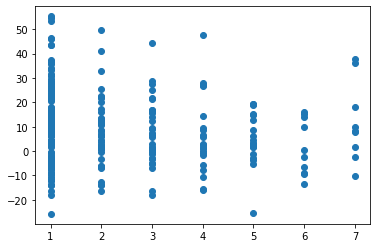

In [41]:
plt.scatter(fs_gd_info['draft_round'], fs_gd_info['skater_score'])

In [42]:
fs_gd_info[fs_gd_info['draft_round']==7]\
[['playername','position','team','opponent','draft_year','overall_pick','skater_score']]

,playername,position,team,opponent,draft_year,overall_pick,skater_score
11,Colin Blackwell,C,SEA,SJS,2011,194,37.820
14,Joe Pavelski,C,DAL,BUF,2003,205,36.198
61,Jacob Middleton,D,SJS,SEA,2014,210,17.965
121,Ryan Dzingel,C,SJS,SEA,2011,204,9.869
140,Steven Lorentz,C,CAR,EDM,2015,186,8.120
143,Josiah Slavin,L,CHI,STL,2018,193,7.780
196,Anton Stralman,D,ARI,WPG,2005,216,1.520
223,Victor Olofsson,L,BUF,DAL,2014,181,-2.352
265,Dominik Kubalik,L,CHI,STL,2013,191,-10.228


## Player Performance by Place of Birth

In [46]:
fs_gd_info.groupby(['place_of_birth']).agg({'skater_score':'sum','nhl_playerid':'count','team':'count','team':'nunique'})\
.sort_values('skater_score', ascending=False).iloc[:3]

,skater_score,nhl_playerid,team
place_of_birth,,,
"Toronto, ON, CAN",97.273,10,7
"Peterborough, ON, CAN",55.826,2,2
"Tampere, FIN",55.683,2,2


## HomeTown Faceoff

In [44]:
fs_gd_info[(fs_gd_info['place_of_birth']=='Peterborough, ON, CAN') |\
           (fs_gd_info['place_of_birth']=='Tampere, FIN')]\
.groupby(['place_of_birth','playername','position','team']).agg({'skater_score':'sum'})

skater_score
place_of_birth        playername     position team              
Peterborough, ON, CAN Barrett Hayton C        ARI         54.620
                      Vince Dunn     D        SEA          1.206
Tampere, FIN          Patrik Laine   L        CBJ          6.185
                      Roope Hintz    C        DAL         49.498

## Player Performance by Alumni League

In [119]:
fs_gd_car[fs_gd_car['league']!='NHL'].groupby('league')\
.agg({'skater_score':'mean','nhl_playerid':'count','nhl_playerid':'nunique'
      ,'team':'count','team':'nunique'})\
.sort_values('nhl_playerid', ascending=False).iloc[40:60]

,skater_score,nhl_playerid,team
league,,,
MHL,1.351000,15,12
QMAAA,11.702318,15,8
U18 SM-sarja,12.818897,15,8
U16 SM-sarja Q,18.398450,14,7
BCHL,7.084231,14,12
T1EHL 16U,0.681688,14,10
CWG,8.683643,14,9
U16 SM-sarja,15.824462,14,7
EYOF,13.451846,13,10


## Alumni Faceoff

In [121]:
l1 = 'BCHL'
l2 = 'USHS-MN'
fs_gd_car[(fs_gd_car['league']==l1) | (fs_gd_car['league']==l2)]\
    .groupby(['league','team_car','playername']).agg({'team':'max','position':'max','skater_score':'mean'})

team position  skater_score
league  team_car               playername                                   
BCHL    Burnaby Express        Brad Hunt          VAN        D        -8.311
        Coquitlam Express      Alexander Kerfoot  TOR        C        34.440
                               Mathew Barzal      NYI        C        33.034
                               Milan Lucic        CGY        L       -28.000
        Langley Rivermen       Dante Fabbro       NSH        D        -4.772
        Merritt Centennials    Brandon Duhaime    MIN        R        -1.740
                               Danton Heinen      PIT        L         8.082
        Penticton Vees         Dante Fabbro       NSH        D        -4.772
                               Mike Reilly        BOS        D         6.902
                               Ryan Johansen      NSH        C       -11.334
        Surrey Eagles          Danton Heinen      PIT        L         8.082
        Trail Smoke Eaters     Dryden Hunt        NYR        L        -9.090
        Victoria Grizzlies     Jamie Benn         DAL        L        34.477
        Victoria Salsa         Jamie Benn         DAL        L        34.477
        Wenatchee Wild         Jasper Weatherby   SJS        C        23.100
        West Kelowna Warriors  Brandon Duhaime    MIN        R        -1.740
        Westside Warriors      Colton Sissons     NSH        C         9.588
                               Justin Schultz     WSH        D        -6.732
USHS-MN Academy of Holy Angels Mike Reilly        BOS        D         6.902
        Blaine High            Nick Bjugstad      MIN        C        -3.450
                               Riley Tufte        DAL        L       -24.310
        Burnsville High        Brock Boeser       VAN        R        19.630
        Duluth East High       Derek Forbort      BOS        D        -3.525
        Edina High             Anders Lee         NYI        L        21.689
                               Kieffer Bellows    NYI        L        25.450
        Grand Rapids High      Alex Goligoski     MIN        D        -9.420
        Hill-Murray School     Jake Guentzel      PIT        L         9.997
        Minnetonka High        K'Andre Miller     NYR        D         3.828
        Rogers High            Nick Jensen        WSH        D         8.620
        St. Thomas Academy     Anders Lee         NYI        L        21.689
        Warroad High           Brock Nelson       NYI        C        50.626
                               T.J. Oshie         WSH        R        21.537

In [122]:
fs_gd_car[(fs_gd_car['league']=='WJC-20') & (fs_gd_car['postseason']=='Champion')].groupby('team_car')\
.agg({'skater_score':'mean','nhl_playerid':'count','nhl_playerid':'nunique'
      ,'team':'count','team':'nunique'})

,skater_score,nhl_playerid,team
team_car,,,
Canada U20,9.914367,25,15
Finland U20,8.651875,8,6
Russia U20,15.019500,4,2
Sweden U20,22.708250,4,4
USA U20,15.021368,19,11


In [48]:
fs_gd_car[(fs_gd_car['league']!='NHL') & (fs_gd_car['postseason']=='Champion')]\
.groupby(['league','season_car','team_car','postseason','teamid'])\
.agg({'nhl_playerid':'count','skater_score':'mean','team':'count','team':'nunique'})\
.sort_values('nhl_playerid',ascending=False).iloc[:10]

nhl_playerid  \
league             season_car team_car    postseason teamid                                           
WJC-20             2012-13    USA U20     Champion   1624/WJC-20/2012-13                          9   
                   2016-17    USA U20     Champion   1624/WJC-20/2016-17                          9   
WC                 2017-18    Sweden      Champion   582/WC/2017-18                               8   
                   2014-15    Canada      Champion   1616/WC/2014-15                              8   
WJC-18             2014-15    USA U18     Champion   1623/WJC-18/2014-15                          7   
WJC-20             2015-16    Finland U20 Champion   1608/WJC-20/2015-16                          6   
WJC-18             2010-11    USA U18     Champion   1623/WJC-18/2010-11                          6   
WC                 2015-16    Canada      Champion   1616/WC/2015-16                              6   
WCup               2016-17    Canada      Champion   1620/WCup/2016-17                            6   
Hlinka Gretzky Cup 2014-15    Canada U18  Champion   14443/Hlinka Gretzky Cup/2014-15             6   

                                                                                       skater_score  \
league             season_car team_car    postseason teamid                                           
WJC-20             2012-13    USA U20     Champion   1624/WJC-20/2012-13                   7.604333   
                   2016-17    USA U20     Champion   1624/WJC-20/2016-17                   4.727778   
WC                 2017-18    Sweden      Champion   582/WC/2017-18                       11.845000   
                   2014-15    Canada      Champion   1616/WC/2014-15                      19.257875   
WJC-18             2014-15    USA U18     Champion   1623/WJC-18/2014-15                   3.389286   
WJC-20             2015-16    Finland U20 Champion   1608/WJC-20/2015-16                  23.846000   
WJC-18             2010-11    USA U18     Champion   1623/WJC-18/2010-11                   9.637833   
WC                 2015-16    Canada      Champion   1616/WC/2015-16                      17.996333   
WCup               2016-17    Canada      Champion   1620/WCup/2016-17                    17.048500   
Hlinka Gretzky Cup 2014-15    Canada U18  Champion   14443/Hlinka Gretzky Cup/2014-15     -2.823000   

                                                                                       team  
league             season_car team_car    postseason teamid                                  
WJC-20             2012-13    USA U20     Champion   1624/WJC-20/2012-13                  6  
                   2016-17    USA U20     Champion   1624/WJC-20/2016-17                  7  
WC                 2017-18    Sweden      Champion   582/WC/2017-18                       6  
                   2014-15    Canada      Champion   1616/WC/2014-15                      7  
WJC-18             2014-15    USA U18     Champion   1623/WJC-18/2014-15                  5  
WJC-20             2015-16    Finland U20 Champion   1608/WJC-20/2015-16                  6  
WJC-18             2010-11    USA U18     Champion   1623/WJC-18/2010-11                  4  
WC                 2015-16    Canada      Champion   1616/WC/2015-16                      4  
WCup               2016-17    Canada      Champion   1620/WCup/2016-17                    4  
Hlinka Gretzky Cup 2014-15    Canada U18  Champion   14443/Hlinka Gretzky Cup/2014-15     6

In [40]:
tid1 = '890/QMJHL/2015-16'
tid2 = '879/OHL/2009-10'
fs_gd_car[(fs_gd_car['teamid']==tid1) | (fs_gd_car['teamid']==tid2)]\
    .groupby(['league','season_car','team_car','postseason','playername'])\
.agg({'team':'max','position':'max','skater_score':'mean'})

team  \
league season_car team_car              postseason playername            
OHL    2009-10    Windsor Spitfires     Champion   Adam Henrique   ANA   
                                                   Austin Watson   OTT   
                                                   Cam Fowler      ANA   
QMJHL  2015-16    Rouyn-Noranda Huskies Champion   Jeremy Lauzon   SEA   
                                                   Philippe Myers  NSH   
                                                   Timo Meier      SJS   

                                                                  position  \
league season_car team_car              postseason playername                
OHL    2009-10    Windsor Spitfires     Champion   Adam Henrique         C   
                                                   Austin Watson         L   
                                                   Cam Fowler            D   
QMJHL  2015-16    Rouyn-Noranda Huskies Champion   Jeremy Lauzon         D   
                                                   Philippe Myers        D   
                                                   Timo Meier            R   

                                                                   skater_score  
league season_car team_car              postseason playername                    
OHL    2009-10    Windsor Spitfires     Champion   Adam Henrique         35.125  
                                                   Austin Watson          2.560  
                                                   Cam Fowler            36.143  
QMJHL  2015-16    Rouyn-Noranda Huskies Champion   Jeremy Lauzon         -8.465  
                                                   Philippe Myers       -12.550  
                                                   Timo Meier            47.041

In [49]:
fs_gd_car[fs_gd_car['teamid']=='206/OHL/2011-12']\
    .groupby(['league','season_car','team_car','postseason','playername'])\
.agg({'team':'max','opponent':'max','position':'max','skater_score':'mean'})

team opponent  \
league season_car team_car       postseason playername                  
OHL    2011-12    London Knights Champion   Bo Horvat    VAN      NYR   
                                            Greg McKegg  NYR      VAN   
                                            Max Domi     CBJ      PIT   

                                                        position  skater_score  
league season_car team_car       postseason playername                          
OHL    2011-12    London Knights Champion   Bo Horvat          C         4.711  
                                            Greg McKegg        C         0.260  
                                            Max Domi           C        -2.150

In [52]:
fs_gd_car.columns

Index(['nhl_playerid', 'ep_playerid', 'playername', 'game_date', 'team',
       'opponent', 'position', 'season', 'game_type', 'skater_score',
       'toi_pts', 'shot_points', 'sat_points', 'goal_points', 'fo_points',
       'specteams_points', 'goals', 'assists', 'plus_minus', 'pim', 'mins',
       'evg', 'shg', 'ppg', 'gwg', 'otg', 'first_goal', 'eng', 'ev_a', 'sh_a',
       'pp_a', 'shots', 'pp_shots', 'sat_relative', 'usat_net',
       'usat_relative', 'sat_net', 'shots_missed', 'shots_missed_crossbar',
       'shots_missed_over', 'shots_missed_post', 'shots_missed_wide',
       'shootout_attempts', 'shootout_goals', 'blocked_shots', 'takeaways',
       'penalties_drawn', 'hits', 'giveaways', 'misconduct', 'game_misconduct',
       'ev_mins', 'sh_mins', 'pp_mins', 'ot_mins', 'pp_toi_pct', 'shifts',
       'faceoffs', 'faceoffs_won', 'faceoffs_lost', 'faceoff_win_pct',
       'g_slap', 'g_wrap', 'g_wrist', 'g_snap', 'g_back', 'g_tip', 'g_def',
       's_def', 's_wrist', 's_snap', 's

In [54]:
fltr1 = fs_gd_car[fs_gd_car['league']=='OHL']['nhl_playerid']
fltr2 = fs_gd_car[fs_gd_car['league']=='NCAA']['nhl_playerid']

fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr1))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr1))]
as_team_ohl = pn_queries.all_star_team(fs, fg)
fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr2))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr2))]
as_team_ncaa = pn_queries.all_star_team(fs, fg)

In [55]:
as_team_ohl

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Alex DeBrincat,CHI,Connor McDavid,EDM,Patrick Kane,CHI,Darnell Nurse,EDM,-,-
1,Jeff Skinner,BUF,J.T. Miller,VAN,Andrei Svechnikov,CAR,Evan Bouchard,EDM,-,-
2,Jason Robertson,DAL,Boone Jenner,CBJ,Cal Clutterbuck,NYI,Brent Burns,SJS,-,-
3,Rickard Rakell,ANA,Bo Horvat,VAN,Josh Bailey,NYI,Mark Giordano,SEA,-,-
4,-,-,-,-,-,-,Cam Fowler,ANA,-,-
5,-,-,-,-,-,-,Jakob Chychrun,ARI,-,-


In [56]:
as_team_ncaa

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Chris Kreider,NYR,Joe Pavelski,DAL,Tage Thompson,BUF,Adam Fox,NYR,-,-
1,Kyle Connor,WPG,Evan Rodrigues,PIT,Clayton Keller,ARI,Jaccob Slavin,CAR,-,-
2,Jake Guentzel,PIT,Trevor Zegras,ANA,Kyle Okposo,BUF,Quinn Hughes,VAN,-,-
3,Zach Hyman,EDM,Brock Nelson,NYI,Brock Boeser,VAN,Jacob Trouba,NYR,-,-
4,-,-,-,-,-,-,Justin Faulk,STL,-,-
5,-,-,-,-,-,-,Brady Skjei,CAR,-,-


In [63]:
fs_gd_awards.groupby('award').agg({'nhl_playerid':'count', 'nhl_playerid':'nunique'})\
.sort_values('nhl_playerid', ascending=False).iloc[:30]

,nhl_playerid
award,
U20 WJC Gold Medal,61
NHL All-Star Game,53
AHL All-Star Game,44
U20 WJC Bronze Medal,39
U20 WJC Silver Medal,39
U20 WJC Top 3 Player on Team,38
NHL Stanley Cup Champion,34
NHL All-Rookie Team,29
U20 WJC All-Star Team,25


In [65]:
fltr1 = fs_gd_awards[fs_gd_awards['award']=='OHL Champion']['nhl_playerid']
fltr2 = fs_gd_awards[fs_gd_awards['award']=='WHL Champion']['nhl_playerid']

fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr1))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr1))]
as_team_ohl_champs = pn_queries.all_star_team(fs, fg)
fs = fantasy_s[fantasy_s['nhl_playerid'].isin(list(fltr2))]
fg = fantasy_g[fantasy_g['nhl_playerid'].isin(list(fltr2))]
as_team_whl_champs = pn_queries.all_star_team(fs, fg)

In [66]:
as_team_ohl_champs

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Alex DeBrincat,CHI,Bo Horvat,VAN,MacKenzie Entwistle,CHI,Evan Bouchard,EDM,-,-
1,Warren Foegele,EDM,Jordan Staal,CAR,-,-,Cam Fowler,ANA,-,-
2,Brock McGinn,PIT,Robert Thomas,STL,-,-,Robert Bortuzzo,STL,-,-
3,-,-,Dylan Strome,CHI,-,-,-,-,-,-


In [67]:
as_team_whl_champs

,Left Wing,LW_Team,Center,C_Team,Right Wing,RW_Team,Defense,D_Team,Goalies,G_Team
0,Jamie Benn,DAL,Leon Draisaitl,EDM,Oliver Bjorkstrand,CBJ,Seth Jones,CHI,-,-
1,Evander Kane,EDM,Cody Eakin,BUF,-,-,Josh Morrissey,WPG,-,-
2,-,-,Noah Gregor,SJS,-,-,Tyler Myers,VAN,-,-
3,-,-,-,-,-,-,Tyson Barrie,EDM,-,-
4,-,-,-,-,-,-,Ethan Bear,CAR,-,-
5,-,-,-,-,-,-,Mark Pysyk,BUF,-,-


In [100]:
fs_gd_awards[fs_gd_awards['award']=='OHL Champion']\
[['ep_playerid','playername','team','position','skater_score','season_aw','award','league']]\
.merge(fs_gd_car[['ep_playerid','team_car','league','season_car','szn_age','postseason']], 
       left_on=['ep_playerid','season_aw','league'], right_on=['ep_playerid','season_car','league'])\
.sort_values('season_aw')\
[['playername','team','position','season_aw','league','team_car','szn_age','postseason']]

,playername,team,position,season_aw,league,team_car,szn_age,postseason
1,Jordan Staal,CAR,C,2005-06,OHL,Peterborough Petes,17.25,Champion
21,Robert Bortuzzo,STL,D,2007-08,OHL,Kitchener Rangers,18.75,Champion
0,Cam Fowler,ANA,D,2009-10,OHL,Windsor Spitfires,18.00,Champion
18,Greg McKegg,NYR,C,2011-12,OHL,Erie Otters,19.50,Did not make playoffs
17,Greg McKegg,NYR,C,2011-12,OHL,London Knights,19.50,Champion
20,Max Domi,CBJ,C,2012-13,OHL,London Knights,17.75,Champion
19,Max Domi,CBJ,C,2012-13,OHL,London Knights,17.75,Champion
12,Bo Horvat,VAN,C,2012-13,OHL,London Knights,17.67,Champion
11,Bo Horvat,VAN,C,2012-13,OHL,London Knights,17.67,Champion
22,Brock McGinn,PIT,L,2013-14,OHL,Guelph Storm,19.83,Champion


In [92]:
fs_gd_car[fs_gd_car['ep_playerid']=='201681'][['game_date','team_car','league','season_car','postseason']]

,game_date,team_car,league,season_car,postseason
2935,2022-02-27,Toronto Pro Hockey,Brick Invitational,2008-09,None
2936,2022-02-27,York Simcoe Express U15 AAA,ETAHL U15,2013-14,None
2937,2022-02-27,York Simcoe Express U16 AAA,ETAHL U16,2014-15,None
2938,2022-02-27,St. Andrew's College,CISAA,2014-15,None
2939,2022-02-27,Team OMHA White,OGC-16,2014-15,None
2940,2022-02-27,York Simcoe Express U16 AAA,OHL Cup,2014-15,None
2941,2022-02-27,London Knights,OHL,2015-16,Champion
2942,2022-02-27,Canada White U17,WHC-17,2015-16,Champion
2943,2022-02-27,Team Blue,U17-Dev,2015-16,None
2944,2022-02-27,London Knights,M-Cup,2015-16,Champion


## Game Recap: Hurricanes @ Wild

In [40]:
game_id = 2021020445

In [41]:
games_df[games_df['game_id']==game_id]\
    [['game_date','home_team','home_score','away_team','away_score','venue','period','game_status']].iloc[0]

game_date              2022-02-13
home_team                    Wild
home_score                      3
away_team              Hurricanes
away_score                      2
venue          Xcel Energy Center
period                          3
game_status                 Final
Name: 743, dtype: object